<a href="https://colab.research.google.com/github/garvjain7/Chatbot/blob/main/VAC_4th_sem_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from ast import increment_lineno
import numpy as np # import numpy for mathematical operation
import pandas as pd # import pandas for data processing, cleaning and manipulation
import matplotlib.pyplot as plt # import matplotlib for visualization
%matplotlib inline
import seaborn as sns

In [ ]:
# import csv file
df = pd.read_csv('Sales-Dataset.csv', encoding='unicode_escape') # import the dataset
df.shape
df # show whole dataset
# df.head()
# df.columns
# df.info()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [27]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True) # it can permanently delete the status and unnamed column from the orginal dataset

In [34]:
pd.isnull(df).sum() # this show the no of null values in each column of a dataset
# pd.isnull(df) # it show whole dataset values as false which is not empty and true when the value is null
df.dropna(inplace=True) # drop null values
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int64')

In [35]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [37]:
df.rename(columns={'Marital_Status':'Shaadi'}) # rename the column

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [38]:
df[['Age','Orders','Amount']].describe() # describe only these three data columns

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


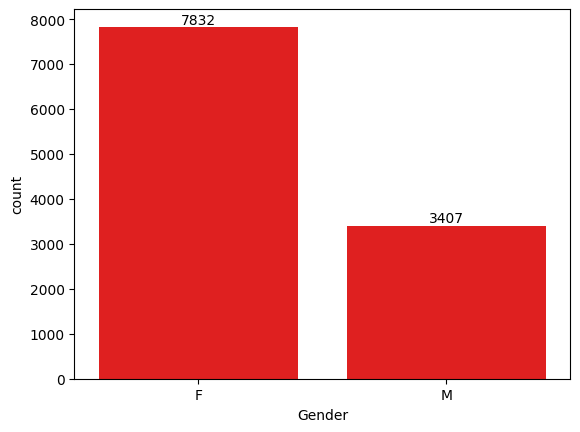

In [40]:
# plotting a bar chart for Gender and it's count using seaborn

ax = sns.countplot(x='Gender', data=df, color='Red') # seaborn function to plot a bar graph (x is the variable for which graph be plotted and data is the dataframe.
for bars in ax.containers: # loop is used for storing the data as M or F from the df in bars variable for ax.containers(countplot)
  ax.bar_label(bars) # bar label is a feature or function

<Axes: xlabel='Gender', ylabel='Amount'>

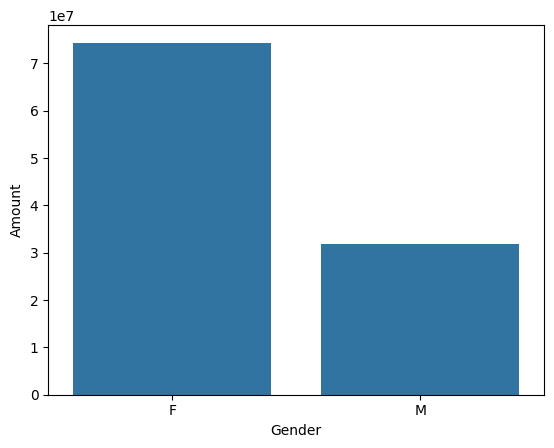

In [43]:
# plotting a bar graph for gender vs total amount
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data = sales_gen)

<Axes: xlabel='Age Group', ylabel='Amount'>

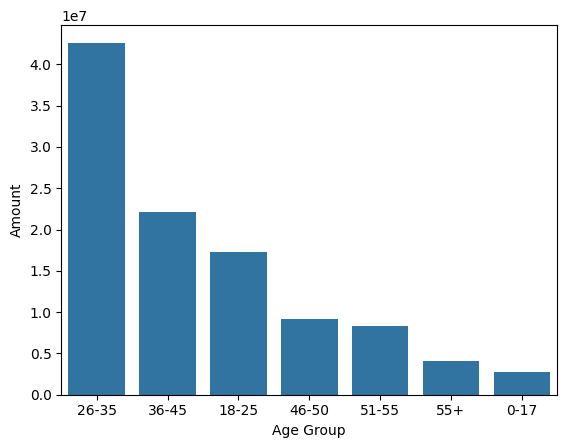

In [49]:
sales_gen = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data = sales_gen)

From above graph we can see that most of the buyers are females and even the purchasing power of female are greater than men

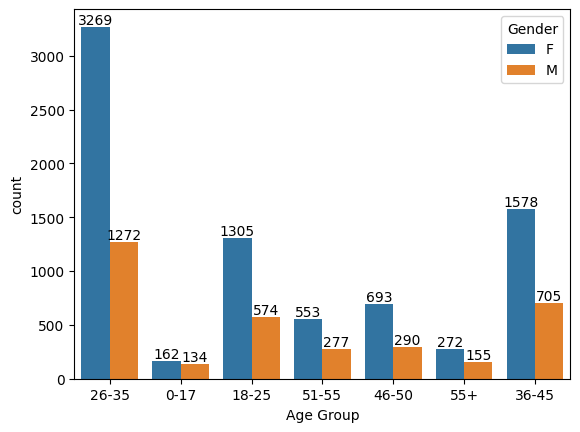

In [52]:
ax = sns.countplot(data=df, x='Age Group', hue='Gender') # hue is to show the difference based on parameters with different color to make the graph looking good
for bars in ax.containers:
  ax.bar_label(bars)

ax = sns.countplot(data=df, x='Age Group', hue='Orders') # show the bar graph by using the parameter order for different colors
for bars in ax.containers:
  ax.bar_label(bars)

From the above graph we can see our target audience that womens of age 26-35 can maximum buy our products and then the women of age group of 36-45

In [ ]:
# total number of order from top 10 states

sales_state = df.groupby()